In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("customer_data.csv")
df.head()

,CustomerID,Age,Gender,ProductCategory,PurchaseAmount,TimeOnSite(min),PurchaseFrequency,Location
0,1001,56,Male,Books,19725,57,5,Hyderabad
1,1002,46,Female,Electronics,645,52,4,Mumbai
2,1003,32,Male,Books,4446,73,3,Hyderabad
3,1004,25,Male,Fashion,10096,109,7,Hyderabad
4,1005,38,Male,Groceries,15875,94,6,Mumbai


In [3]:
df.shape

(500, 8)

In [4]:
df.describe()

,CustomerID,Age,PurchaseAmount,TimeOnSite(min),PurchaseFrequency
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,39.326000,10141.096000,59.302000,5.038000
std,144.481833,12.200386,5874.943989,33.162906,2.514996
min,1001.000000,18.000000,113.000000,5.000000,1.000000
25%,1125.750000,29.000000,4887.500000,29.000000,3.000000
50%,1250.500000,41.000000,10335.500000,58.000000,5.000000
75%,1375.250000,50.000000,15389.750000,87.000000,7.000000
max,1500.000000,59.000000,19995.000000,119.000000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         500 non-null    int64 
 1   Age                500 non-null    int64 
 2   Gender             500 non-null    object
 3   ProductCategory    500 non-null    object
 4   PurchaseAmount     500 non-null    int64 
 5   TimeOnSite(min)    500 non-null    int64 
 6   PurchaseFrequency  500 non-null    int64 
 7   Location           500 non-null    object
dtypes: int64(5), object(3)
memory usage: 31.4+ KB


In [6]:
# Clean and prepare
df.dropna(inplace=True)

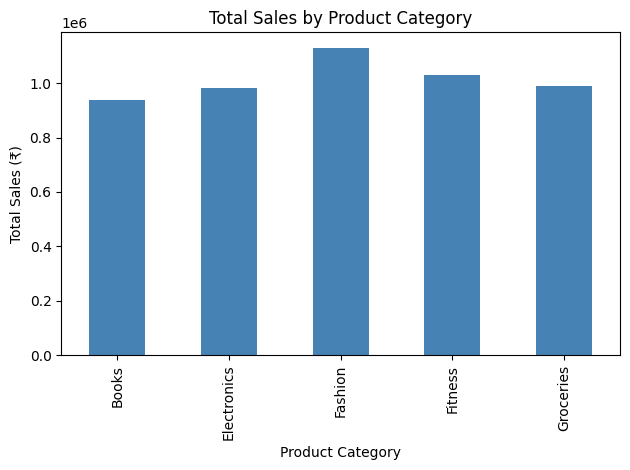

In [7]:
# Total spend per category
category_sales = df.groupby('ProductCategory')['PurchaseAmount'].sum()
category_sales.plot(kind='bar', color='steelblue')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales (₹)")
plt.tight_layout()
plt.show()


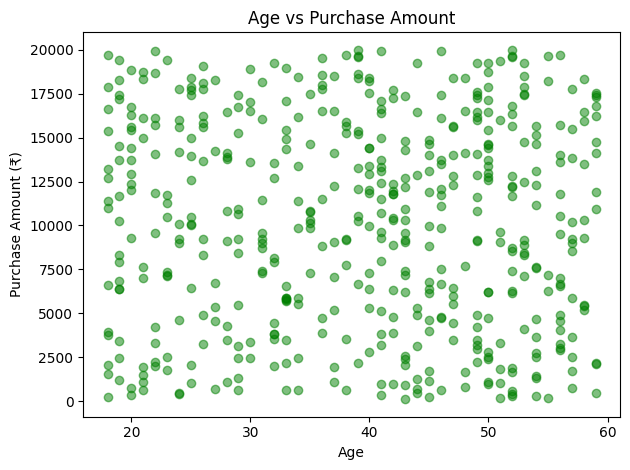

In [8]:
# Age vs Purchase Amount
plt.scatter(df['Age'], df['PurchaseAmount'], alpha=0.5, c='green')
plt.title("Age vs Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (₹)")
plt.tight_layout()
plt.show()



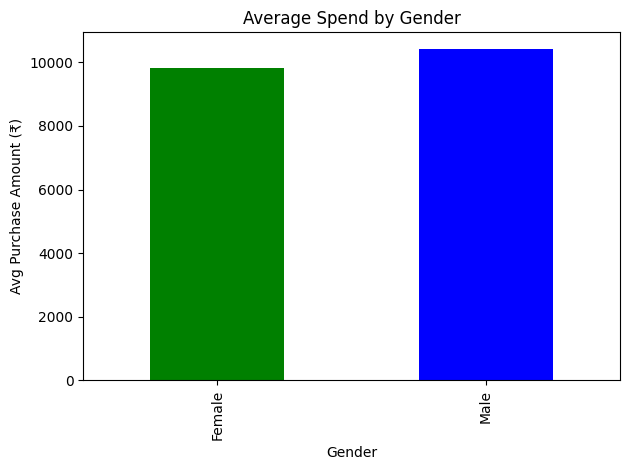

In [9]:
# Gender-wise spending
gender_spend = df.groupby('Gender')['PurchaseAmount'].mean()
gender_spend.plot(kind='bar', color=['green', 'blue'])
plt.title("Average Spend by Gender")
plt.ylabel("Avg Purchase Amount (₹)")
plt.tight_layout()
plt.show()


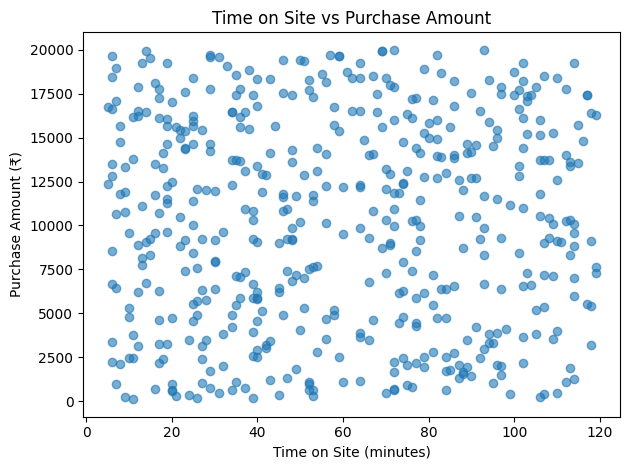

In [10]:
# Time on site vs Purchase
plt.scatter(df['TimeOnSite(min)'], df['PurchaseAmount'], alpha=0.6)
plt.title("Time on Site vs Purchase Amount")
plt.xlabel("Time on Site (minutes)")
plt.ylabel("Purchase Amount (₹)")
plt.tight_layout()
plt.show()


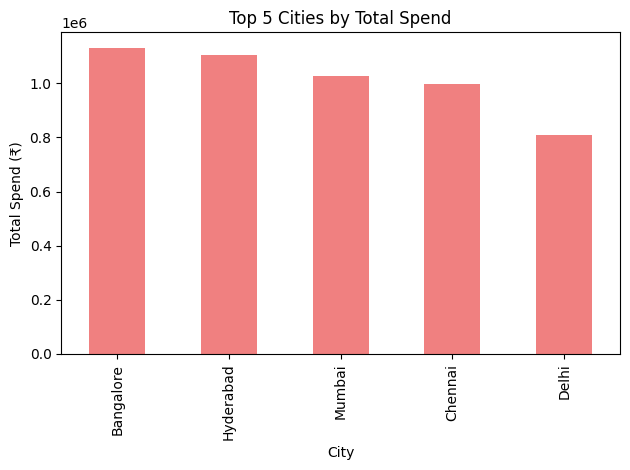

In [11]:
# Top 5 spending cities
top_cities = df.groupby('Location')['PurchaseAmount'].sum().sort_values(ascending=False).head(5)
top_cities.plot(kind='bar', color='lightcoral')
plt.title("Top 5 Cities by Total Spend")
plt.xlabel("City")
plt.ylabel("Total Spend (₹)")
plt.tight_layout()
plt.show()

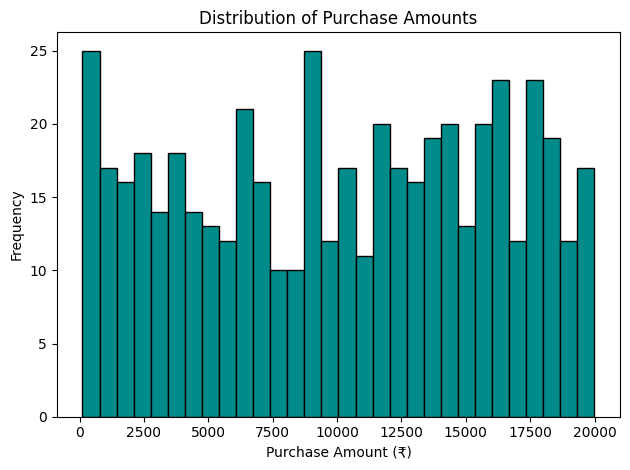

In [12]:
plt.hist(df['PurchaseAmount'], bins=30, color='darkcyan', edgecolor='black')
plt.title("Distribution of Purchase Amounts")
plt.xlabel("Purchase Amount (₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_22620\3327188656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='PurchaseAmount', data=df, palette='pastel')


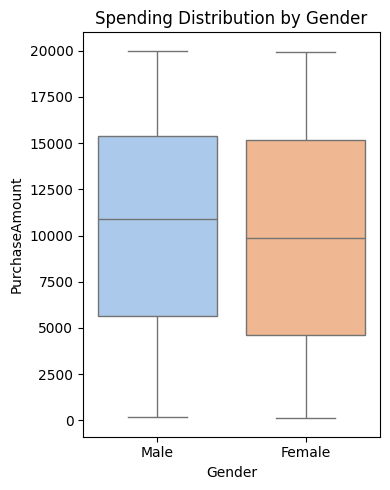

In [13]:
import seaborn as sns
plt.figure(figsize=(4, 5))
sns.boxplot(x='Gender', y='PurchaseAmount', data=df, palette='pastel')
plt.title("Spending Distribution by Gender")
plt.tight_layout()
plt.show()

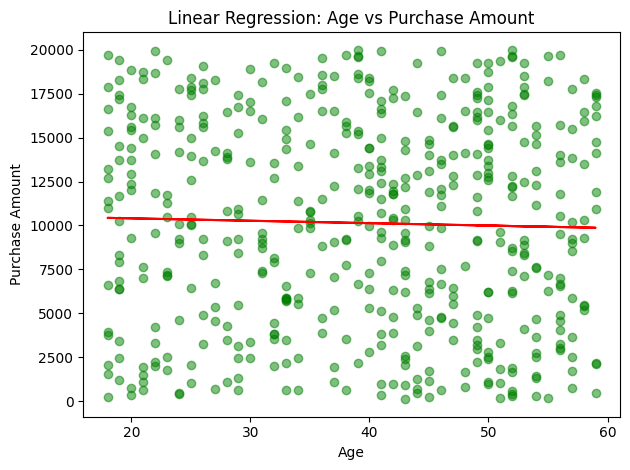

In [15]:
from sklearn.linear_model import LinearRegression

plt.scatter(df['Age'], df['PurchaseAmount'], alpha=0.5, color='green')
X_age = df[['Age']]
y_amt = df['PurchaseAmount']

model_age = LinearRegression()
model_age.fit(X_age, y_amt)
y_pred_line = model_age.predict(X_age)

plt.plot(df['Age'], y_pred_line, color='red')
plt.title("Linear Regression: Age vs Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.tight_layout()
plt.show()